In [2]:
#Photometry and Data Reduction

import astropy
import numpy as np
import photutils
import matplotlib.pyplot as plt
import glob
import ccdproc
from astropy.io import fits

bias_list = glob.glob('Data/Wolf1346/bias*.fits')
wolf01 = fits.getdata('Data/Wolf1346/wolf1346_.0001.fits')
wolf02 = fits.getdata('Data/Wolf1346/wolf1346_.0001.fits')
wolf02os = fits.getdata('Data/Wolf1346/wolf1346_.0001.fits')
wolf03 = fits.getdata('Data/Wolf1346/wolf1346_.0001.fits')
wolf_m01 = fits.getdata('Data/Wolf1346/wolf1346_m.0001.fits')
flat_list = glob.glob('Data/Wolf1346/flat*.fits')
'''
print(wolf01.info())
x = 0
y = 1
while i < len(wolf02):
    if (x == 2102):
        x = 1
        y = y + 1
    else:
        x = x + 1
    if (x > 1023 & x < 1077):
        del wolf02os[i]
    if (y > 1023 & y <  1027):
        del wolf02os[i]
'''

'\nprint(wolf01.info())\nx = 0\ny = 1\nwhile i < len(wolf02):\n    if (x == 2102):\n        x = 1\n        y = y + 1\n    else:\n        x = x + 1\n    if (x > 1023 & x < 1077):\n        del wolf02os[i]\n    if (y > 1023 & y <  1027):\n        del wolf02os[i]\n'

In [3]:
data_stack = []
i = 0
for file in bias_list:
    data_stack.append(fits.getdata(file))
    print(np.mean(fits.getdata(file)))
while i < len(data_stack):
    if(i != 0):
        masterBias = masterBias + data_stack[i]
    i = i + 1
masterBias = masterBias / len(data_stack)
print("master")
print(np.mean(masterBias))
def subtractBias (wolf, bias):
    Bwolf = wolf
    j = 0
    for i in bias:
        Bwolf[j] = Bwolf[j] - i
        j = j + 1
    return Bwolf    
bWolf01 = subtractBias(wolf01, masterBias)
bWolf02 = subtractBias(wolf02, masterBias)
bWolf03 = subtractBias(wolf03, masterBias)
bWolf_m01 = subtractBias(wolf_m01, masterBias)

351.70354319927594
351.3568139518693
351.65315007774245
351.7383458262746
351.675116381611
351.7116537095913
351.40129446984287
351.67762200923625
351.6943257292706
351.5752312547864
351.4999043883874


NameError: name 'masterBias' is not defined

In [ ]:
#used to find filters for each flat
flat = fits.open(flat_list[36])
flat[0].header
data_stack_WashM = []
data_stack_Rc = []
i = 0
for file in flat_list:
    if(i < 12):
        data_stack_WashM.append(fits.getdata(file))
    else:
        data_stack_Rc.append(fits.getdata(file))
    i = i + 1
i = 0
WashMFlat = data_stack_WashM[0]
RcFlat = data_stack_Rc[0]
while i < len(data_stack_WashM):
    if(i != 0):
        WashMFlat = WashMFlat + data_stack_WashM[i]
    i = i + 1
i = 0
while i < len(data_stack_Rc):
    if(i != 0):
        RcFlat = RcFlat + data_stack_Rc[i]
    i = i + 1

213
 id     xcentroid      ...        flux                mag         
--- ------------------ ... ------------------ --------------------
  1  561.2974325589879 ...  675.8642160285143   -7.074648632779999
  2 1025.5081449300444 ... 368.87311864015953   -6.417192518714765
  3  565.1097755257548 ... 486.46954632812634   -6.717639145038067
  4 111.56900065185258 ... 1.0465215681619335 -0.04937045826867556
  5 172.86654027665176 ...  28.44479934446698  -3.6350071862773947
  6  587.5940128282505 ... 13.553312112261107   -2.830113598967862
  7  550.5947592235465 ...  3.379749982424605  -1.3222114361457404
  8  10.52858377365873 ...  2.547679555279461   -1.015362004874836
  9 306.83989170310633 ... 2.8135989701402804  -1.1231554908610026
 10  288.2562561709803 ... 2.9851598829537123  -1.1874189914482574
...                ... ...                ...                  ...
203  89.17363160137538 ...  6.939638923303313   -2.103342185612486
204  758.4066271061092 ...  13.03005132818014  -2.78736531

id,xcenter,ycenter,aperture_sum
,pix,pix,
int32,float64,float64,float64
1,561.2974325589879,1.0577676720881253,2303508.0
2,1025.5081449300444,1.5347015376509194,414943.0
3,565.1097755257548,4.1101516588885305,3009820.0
4,111.56900065185258,8.824785728753664,24272.0
5,172.86654027665176,24.84381339416416,102609.0
6,587.5940128282505,36.75177322742213,67228.0
7,550.5947592235465,40.52303623205349,32968.0
8,10.52858377365873,53.14306479906435,27603.0


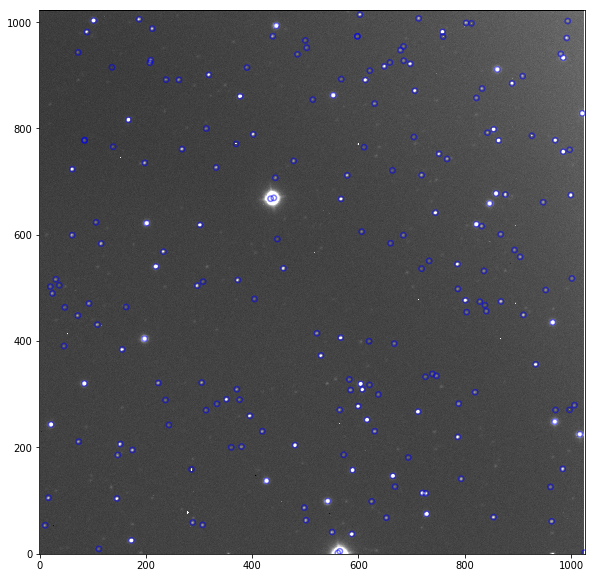

In [11]:
from photutils import DAOStarFinder
from photutils import CircularAperture
from photutils import CircularAnnulus
from photutils import aperture_photometry
from astropy.visualization import SqrtStretch
from astropy.visualization.mpl_normalize import ImageNormalize

from photutils import aperture_photometry


Quad = fits.open('Data/quadRU.fits')
Quad[0].scale('int64','bzero')
DAO = DAOStarFinder(threshold=100, fwhm=4)
stars = DAO(Quad[0].data)
print(len(stars))
print(stars)
x_values = stars['xcentroid']
y_values = stars['ycentroid']

fig, ax = plt.subplots(figsize=(10, 10))
xy = (x_values, y_values)
circularAperture = CircularAperture(xy, 5)
annulus = CircularAnnulus(xy, 3, 10)
norm = ImageNormalize(stretch=SqrtStretch())
plt.imshow(Quad[0].data, cmap='gray', origin='lower', vmin = 0, vmax=1000)
circularAperture.plot(color='blue', lw=1.5, alpha=0.5)

aperture_photometry(Quad[0].data, circularAperture, method='center')

 id  xcenter   ycenter  aperture_sum_0 aperture_sum_1
       pix       pix                                 
--- --------- --------- -------------- --------------
  1 561.29743 1.0577677      2255870.4      2887348.6
  2 1025.5081 1.5347015      414855.71      435516.36
  3 565.10978 4.1101517        3041706      2866576.4
  4   111.569 8.8247857      24171.478       75300.55
  5 172.86654 24.843813       102651.2      110485.75
  6 587.59401 36.751773      66504.838      100081.56
  7 550.59476 40.523036      33071.781      85091.894
  8 10.528584 53.143065      27518.265      76749.873
  9 306.83989 53.965453      28889.633      78865.999
 10 288.25626 58.445419      30047.858      82074.914
...       ...       ...            ...            ...
204 758.40663  981.6634      58887.297      107581.97
205 212.10186 987.81725      32920.445      76977.572
206 445.52849 993.16693      228565.29      165678.67
207 812.85047 997.80101      28104.622      101351.82
208 802.66946 998.54887     

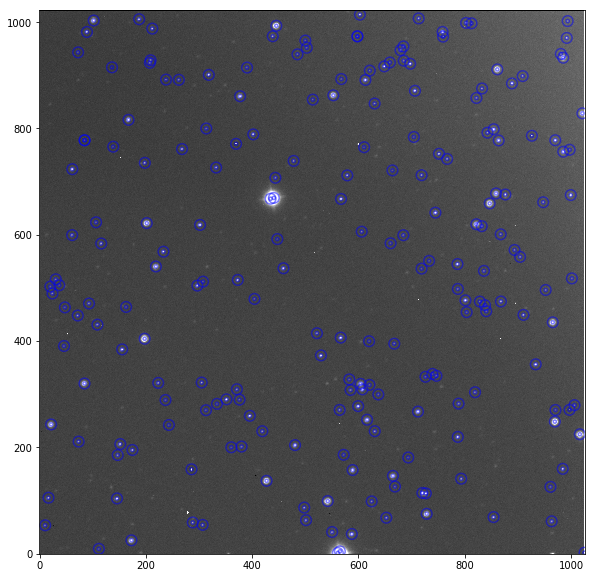

In [14]:
fig, ax = plt.subplots(figsize=(10, 10))
plt.imshow(Quad[0].data, cmap='gray', origin='lower', vmin = 0, vmax=1000)
annulus.plot(color='blue', lw=1.5, alpha=0.5)

apertures = [circularAperture, annulus]
phot_table = aperture_photometry(Quad[0].data, apertures)
for col in phot_table.colnames:
    phot_table[col].info.format = '%.8g'  # for consistent table output
print(phot_table)

bkg_mean = phot_table['aperture_sum_1'] / annulus.area()

bkg_sum = bkg_mean * circularAperture.area()
final_sum = phot_table['aperture_sum_0'] - bkg_sum
phot_table['residual_aperture_sum'] = final_sum
phot_table['residual_aperture_sum'].info.format = '%.8g'  # for consistent table output
print(phot_table['residual_aperture_sum'])


<BarContainer object of 213 artists>

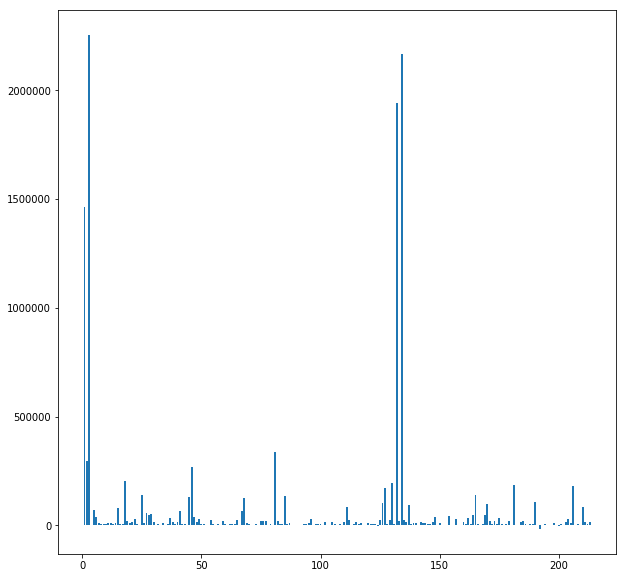

In [23]:
fig, ax = plt.subplots(figsize=(10, 10))

x = phot_table['id']
y = phot_table['residual_aperture_sum']

ax.bar(x,y)

In [ ]:
from photutils.detection import IRAFStarFinder
from photutils.psf import IntegratedGaussianPRF, DAOGroup
from photutils.background import MMMBackground, MADStdBackgroundRMS
from astropy.modeling.fitting import LevMarLSQFitter
from astropy.stats import gaussian_sigma_to_fwhm
from photutils.psf import IterativelySubtractedPSFPhotometry

bkgrms = MADStdBackgroundRMS()
std = bkgrms(Quad[0].data)
iraffind = IRAFStarFinder(threshold=3.5*std,
                          fwhm=2.0*gaussian_sigma_to_fwhm,
                          minsep_fwhm=0.01, roundhi=5.0, roundlo=-5.0,
                          sharplo=0.0, sharphi=2.0)
daogroup = DAOGroup(4.0*gaussian_sigma_to_fwhm)
mmm_bkg = MMMBackground()
fitter = LevMarLSQFitter()
psf_model = IntegratedGaussianPRF(sigma=2.0)

photometry = IterativelySubtractedPSFPhotometry(finder=iraffind,
                                                group_maker=daogroup,
                                                bkg_estimator=mmm_bkg,
                                                psf_model=psf_model,
                                                fitter=LevMarLSQFitter(),
                                                niters=1, fitshape=(11,11))
result_tab = photometry(image=Quad[0].data)
residual_image = photometry.get_residual_image()

fig, ax = plt.subplots(figsize=(10, 10))
plt.imshow(residual_image, cmap='gray', origin='lower')